# Patent analysis on Powertrain technologies
Data collected on multiple powertrain technologies such as electric vehicle, hybrid electric vehicle, fuel cells vehicles and internal combusion engine(traditional vehicles) patent. We have made a text analysis on these technologies and performed topic modeling.<br>

We will use LSA model for this notebook

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd

# 2) Loading data

In [4]:
assignments = pd.read_csv('patent_ev.csv')

In [5]:
assignments.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,num_citing_publn,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title
0,DE69118393A,14285742,1239277,2,0,0,WO9105114W,1991-08-07,1996-05-02,DE69118393D1,...,0,NaN,NaN,NaN,NaN,NaN,30,"ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL","ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL",ELEKTRISCHES ENERGIESYSTEM
1,DE69118393T,14285743,1239277,2,0,1,WO9105114W,1991-08-07,1996-09-05,DE69118393T2,...,2,2016-02-25\n2018-05-22,DE102014216372A1\nUS9975438B2,DE102014216372A\nUS201715436024A,449479509\n479351260,53836089\n53836089,30,"ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL","ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL",ELEKTRISCHES ENERGIESYSTEM
2,EP91915464A,16916549,1239277,2,0,1,WO9105114W,1991-08-07,1993-09-01\n1994-03-09\n1996-03-27,EP0557287A1\nEP0557287A4\nEP0557287B1,...,1,2007-12-25,US7313469B2,US51676105A,51497271,29718835,30,ELECTRIC FUEL (E.F.L.) LTD.,ELECTRIC FUEL (E.F.L.) LTD.,ELECTRICAL ENERGY SYSTEM
3,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,1,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM
4,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,44,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system


In [6]:
assignments['granted'].value_counts()

1    16981
0     6851
Name: granted, dtype: int64

1    16981
0     6851
Name: granted, dtype: int64


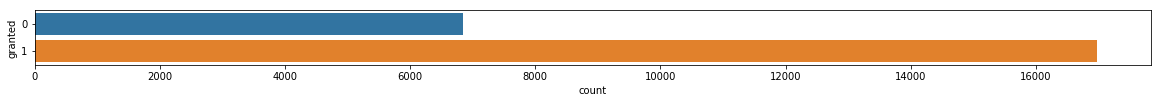

In [7]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='granted', data=assignments);
print(assignments.granted.value_counts())

In [8]:
assignments.shape

(23832, 32)

In [9]:
patent=assignments['appln_title']

In [10]:
patent[:3]

0    ELEKTRISCHES ENERGIESYSTEM
1    ELEKTRISCHES ENERGIESYSTEM
2      ELECTRICAL ENERGY SYSTEM
Name: appln_title, dtype: object

**Need full abstract or atleast full title of given patent**

## a) Types of features in our dataset

In [11]:
assignments.dtypes.value_counts()

object    21
int64     11
dtype: int64

In [12]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(assignments)
table_dtype

,Data Type
num_cited_publn,int64
appln_id,int64
family_id,int64
sets,int64
direct,int64
granted,int64
num_cited_family,int64
num_citing_family,int64
num_citing_publn,int64
num_ipc_class,int64


## b) Checking missing values

In [13]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [14]:
missing_values = find_missing_values(assignments, columns=assignments.columns)
missing_values

Number of missing or NaN values for each column:


{'appln': 0,
 'appln_id': 0,
 'family_id': 0,
 'sets': 0,
 'direct': 0,
 'granted': 0,
 'earliest_appln': 0,
 'earliest_filing_date': 0,
 'publn_date': 0,
 'publn': 0,
 'publn_first_grant': 0,
 'num_cpc_class': 0,
 'cpc_class': 1624,
 'num_ipc_class': 0,
 'ipc_class': 85,
 'num_cited_publn': 0,
 'cited_publn_date': 9456,
 'cited_publn': 9456,
 'cited_appln': 9456,
 'cited_appln_id': 9456,
 'cited_family_id': 9456,
 'num_cited_family': 0,
 'num_citing_publn': 0,
 'citing_publn_date': 10499,
 'citing_publn': 10499,
 'citing_appln': 10499,
 'citing_appln_id': 10499,
 'citing_family_id': 10499,
 'num_citing_family': 0,
 'earliest_applt': 843,
 'current_applt': 843,
 'appln_title': 0}

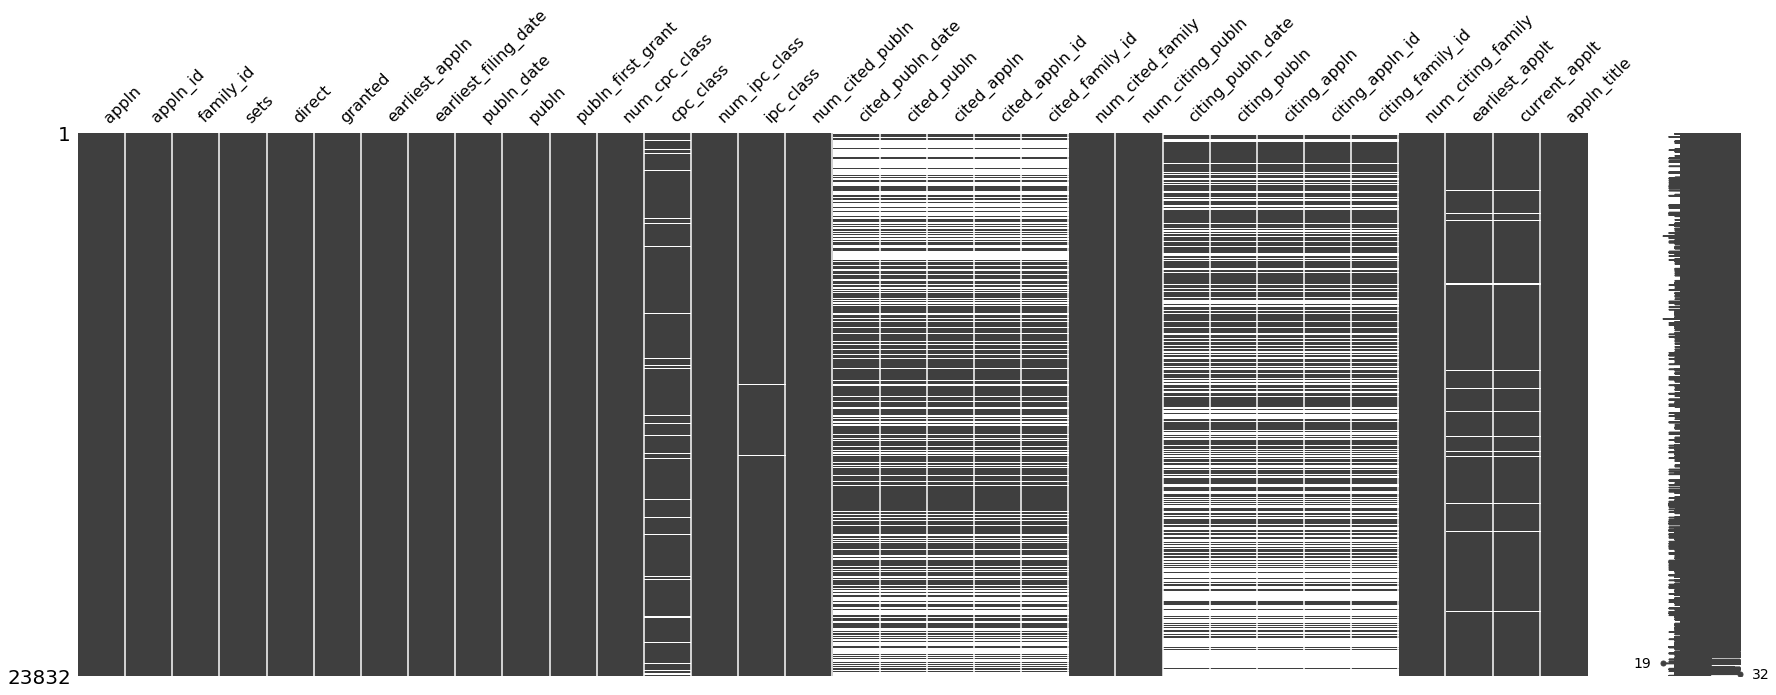

In [15]:
import missingno
missingno.matrix(assignments, figsize = (30,10))

In [16]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(assignments)

No. of fields:  23832
No. of missing fields:  14


,No. of mising Value,%age of missing Value
citing_publn,10499,44.1
citing_publn_date,10499,44.1
citing_family_id,10499,44.1
citing_appln_id,10499,44.1
citing_appln,10499,44.1
cited_publn,9456,39.7
cited_appln_id,9456,39.7
cited_family_id,9456,39.7
cited_publn_date,9456,39.7
cited_appln,9456,39.7


## c) Checking data for text analysis

In [17]:
chars = list(set(patent)) 
data_size, vocab_size = len(patent), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 23832
Patent data has unique chars 16419


**We do not have have a higher difference in unique words and total chars. That's why we need abstract or atleast full title**

### Creating a dataframe for data exploring


In [18]:
data_text = assignments[['appln_title']]

In [19]:
type(data_text)

pandas.core.frame.DataFrame

In [20]:
data_text[:5]

,appln_title
0,ELEKTRISCHES ENERGIESYSTEM
1,ELEKTRISCHES ENERGIESYSTEM
2,ELECTRICAL ENERGY SYSTEM
3,ELECTRICAL ENERGY SYSTEM
4,Electrical energy system


In [21]:
data_text['index'] = data_text.index
documents = data_text

In [22]:
documents.head()

,appln_title,index
0,ELEKTRISCHES ENERGIESYSTEM,0
1,ELEKTRISCHES ENERGIESYSTEM,1
2,ELECTRICAL ENERGY SYSTEM,2
3,ELECTRICAL ENERGY SYSTEM,3
4,Electrical energy system,4


In [23]:
print(len(documents))

23832


In [24]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

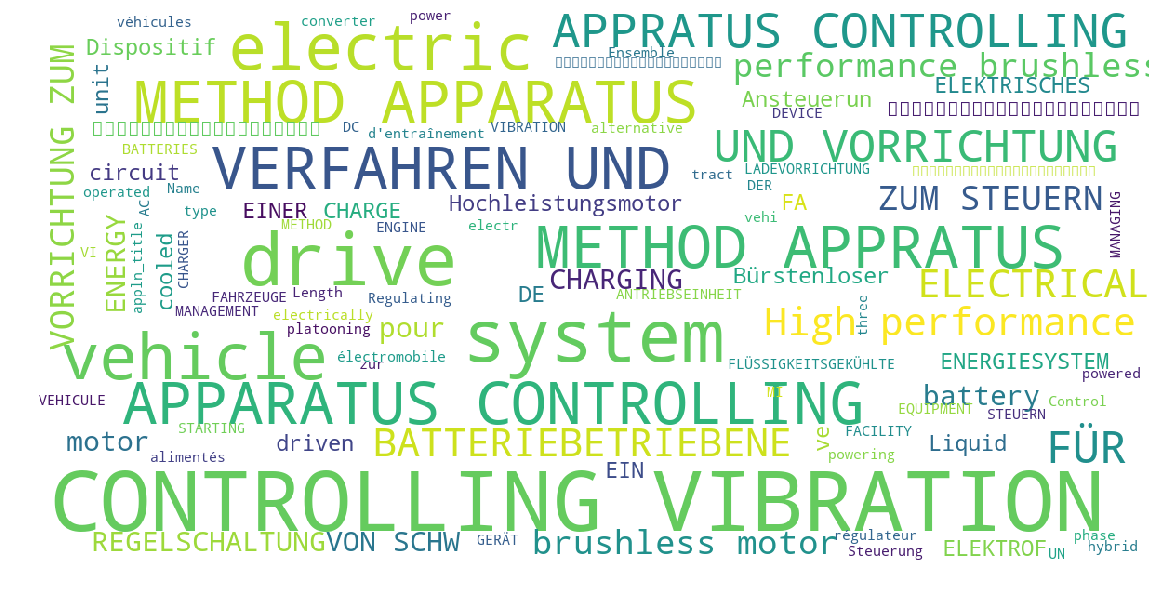

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(documents['appln_title'].dropna())

# 3) Cleaning and Preprocessing

In [26]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

### 3.1 tokenize
The first thing we have to do is **tokenize** our words. A naive way to do this would be to split our string based on spaces (e.g. str.split(" ")), which is sometimes OK but has many edge cases (alternative punctuation marks like —, for example) and will fail to work as expected for larger problems.

nltk comes with a built-in word tokenizer that we can take advantage of.

In [27]:
titles = assignments['appln_title'] 

In [28]:
type(titles)

pandas.core.series.Series

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
title_tokens = [nltk.word_tokenize(title) for title in\
                    np.concatenate(titles.map(str).map(str.title).map(lambda s: s.split("|")))]

In [31]:
#Keeping token >1
title_tokens = [title for title in title_tokens if len(title_tokens) > 1]

In [32]:
len(title_tokens)

23832

In [33]:
title_tokens[:3]

[['Elektrisches', 'Energiesystem'],
 ['Elektrisches', 'Energiesystem'],
 ['Electrical', 'Energy', 'System']]

In [34]:
print(title_tokens[500])

['Battery', 'Charge', 'Controller', 'For', 'Electric', 'Vehicle']


### 3.2) stem
Next, we will stem our words. Stemming is a procedure in natural language processing where we chop off everything except for the root of a word. So for example, the words go, going, and gone will all map to the same root—go.
This is a good thing to do, particularly given the small size of our documents, because it increases the accuracy of classifications—more things end up being the same.
nltk comes with several stemmers installed, we'll use the PorterStemmer

In [35]:
stemmer = nltk.stem.PorterStemmer()
titles_stemmed = [[stemmer.stem(token) for token in tokens] for tokens in title_tokens]

In [36]:
titles_stemmed[:3]

[['elektrisch', 'energiesystem'],
 ['elektrisch', 'energiesystem'],
 ['electr', 'energi', 'system']]

In [37]:
print(titles_stemmed[500])

['batteri', 'charg', 'control', 'for', 'electr', 'vehicl']


If we examine a list of words, we see that the most common English-language words dominate

In [38]:
print(pd.Series(np.concatenate(titles_stemmed)).value_counts())

electr                                                           17946
vehicl                                                           15697
for                                                              10774
and                                                               8723
system                                                            6838
control                                                           6368
method                                                            6109
Of                                                                5967
charg                                                             4934
devic                                                             4381
power                                                             3953
,                                                                 3799
batteri                                                           3610
hybrid                                                            3094
A     

These words carry no meaning and aren't very interesting.For example, we can see "," has occurance of 3799. 
They're known as stopwords in NLP, and we're going to once again use nltk builtins to remove them from consideration.

### 3.3) stopwords

In [39]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
english_stopwords = set([word.title() for word in stopwords.words("english")])

In [41]:
stemmed_title_words = [[word for word in title if word not in english_stopwords] for title in titles_stemmed]

In [42]:
stemmed_title_words[:3]

[['elektrisch', 'energiesystem'],
 ['elektrisch', 'energiesystem'],
 ['electr', 'energi', 'system']]

In [43]:
print(stemmed_title_words[500])

['batteri', 'charg', 'control', 'for', 'electr', 'vehicl']


In [44]:
word_counts = pd.Series(np.concatenate(stemmed_title_words)).value_counts()
singular_words = set(word_counts[pd.Series(np.concatenate(stemmed_title_words)).value_counts() == 1].index)

In [45]:
stemmed_title_common_words = [[word for word in title if word not in singular_words] for title in stemmed_title_words]

In [46]:
stemmed_title_common_words[:5]

[['elektrisch', 'energiesystem'],
 ['elektrisch', 'energiesystem'],
 ['electr', 'energi', 'system'],
 ['electr', 'energi', 'system'],
 ['electr', 'energi', 'system']]

Next, let's consider the opposite problem: words that occur to infrequently to be useful. Words that only ever appear once, for example, don't carry any information. Remember, we're going to split all of our patent titles into some small number of classes; just as in any other dataset, a data point which is only populated once isn't interesting, and can be safely dropped.

In fact, we could probably drop a lot of words from consideration, not just ones appearing once but ones appearing tens or even hundreds of times. This would speed up our algorithms and won't significantly impact our results.

After a certain point words do start to matter, however; figuring out where that point is is up to you.

In our case we'll just be lazy and cut off at words that appear only once, and leave words appearing twice or more intact.

In [47]:
non_empty_indices = [i for i in range(len(stemmed_title_common_words)) if len(stemmed_title_common_words[i]) > 0]

In [48]:
non_empty_indices[5000]

5007

Notice that discarding words from our set has resulted in a handful of empty titles. Apparently a few patents have nothing but unique words!

In [49]:
stemmed_title_common_words_nonnull = np.asarray(stemmed_title_common_words)[non_empty_indices]

In [50]:
classifiable_titles = np.asarray(title_tokens)[non_empty_indices]

In [51]:
classifiable_titles[:5]

array([list(['Elektrisches', 'Energiesystem']),
       list(['Elektrisches', 'Energiesystem']),
       list(['Electrical', 'Energy', 'System']),
       list(['Electrical', 'Energy', 'System']),
       list(['Electrical', 'Energy', 'System'])], dtype=object)

With our titles adequately processed, now we switch over to gensim. The first thing we have to do is build a dictionary of words, which associates each word [stem] with a particular index number:

# 4) Bag of words

In [52]:
dictionary = gensim.corpora.Dictionary(stemmed_title_common_words_nonnull)

In [53]:
str(dictionary.token2id)[:1000]

'{\'elektrisch\': 0, \'energiesystem\': 1, \'electr\': 2, \'energi\': 3, \'system\': 4, \'batteriebetrieben\': 5, \'fahrzeug\': 6, \'für\': 7, \'regelschaltung\': 8, \'battery-oper\': 9, \'circuit\': 10, \'for\': 11, \'regul\': 12, \'vehicl\': 13, \'.\': 14, \'batteri\': 15, "d\'accumulateur": 16, \'dispositif\': 17, \'par\': 18, \'pour\': 19, \'une\': 20, \'véhicul\': 21, \'antriebseinheit\': 22, \'ein\': 23, \'elektromobil\': 24, \'drive\': 25, \'liquid-cool\': 26, \'unit\': 27, "d\'entraîn": 28, \'ensembl\': 29, \'électromobil\': 30, \'motor\': 31, \'elektrofahrzeug\': 32, \'battery-driven\': 33, \'control\': 34, \'(\': 35, \')\': 36, \'n/a\': 37, \'ladevorrichtung\': 38, \'charg\': 39, \'driven\': 40, \'De\': 41, \'Un\': 42, \'vehicul\': 43, \'and\': 44, \'brushless\': 45, \'high\': 46, \'perform\': 47, \'ansteuerung\': 48, \'bürstenlos\': 49, \'elektrofahrzeugmotorisierung\': 50, \'hochleistungsmotor\': 51, \'und\': 52, \'convert\': 53, \'power\': 54, \'traction\': 55, \'type\': 5

Why are we doing this? Because shortly we're going to throw our corpus into a tf-idf algorithm. TF-IDF is an algorithm in information retrieval which converts a list of word "vectors" to a scaled Euclidian normal vector. It turns a count of the number of each word in our document into a unit vector in N-dimensional space, where N is, believe it or not, the number of individual words that we have in our dictionary (above).

That means that, in this case, we have a "dataset" matrix with hundreds of thousands of columns in it!
The beauty of TD-IDF is that it scales the words according to how frequent or rare they are. Words that appear a lot in your text but also appear a lot in the rest of the corpus are weighed less heavily than words that appear a lot in your text but more rarely outside of it.

Thus we first use gensim to convert our words to word incidence vectors...

In [54]:
corpus = [dictionary.doc2bow(text) for text in stemmed_title_common_words_nonnull]

In [55]:
stemmed_title_common_words_nonnull[0], corpus[0]

(['elektrisch', 'energiesystem'], [(0, 1), (1, 1)])

In [56]:
print(stemmed_title_common_words_nonnull[2], corpus[2])

['electr', 'energi', 'system'] [(2, 1), (3, 1), (4, 1)]


In [57]:
print(stemmed_title_common_words_nonnull[100], corpus[100])

['drive', 'devic', 'for', 'electr', 'motorcar'] [(2, 1), (11, 1), (25, 1), (72, 1), (245, 1)]


run TfidfModel from gensim on them to turn them into our word vectors!

# 5) Tfidf Model

In [58]:
from gensim.models import TfidfModel
tfidf = TfidfModel(corpus)

In [59]:
stemmed_title_common_words_nonnull[0], corpus[0], tfidf[corpus[0]]

(['elektrisch', 'energiesystem'],
 [(0, 1), (1, 1)],
 [(0, 0.4264195246232712), (1, 0.9045255049030201)])

In [60]:
print(stemmed_title_common_words_nonnull[2], corpus[2], tfidf[corpus[2]])

['electr', 'energi', 'system'] [(2, 1), (3, 1), (4, 1)] [(2, 0.11489137452816378), (3, 0.9199760521533868), (4, 0.3747586363558524)]


With our words suitibly datified, we can now move on to fitting a model. Since our words are now, effectively, a very large dataset, it's possible to use any general purpose classifier to fit it. For example,We could use a scipy KMeans clustering algorithm to arrive at its topics.

We'll instead use a model specifically adapted to natural language processing from the gensim built-ins, LsiModel

# 6) LSI Model

In [61]:
from gensim.models import LsiModel

In [63]:
corpus_tfidf = tfidf[corpus]
lsi_tfidf = LsiModel(tfidf[corpus], id2word=dictionary, num_topics=10)
corpus_lsi = lsi_tfidf[corpus_tfidf]

Here's a printout of what words are important to our various topics. Notice that certain extremely common words, like semiconductor, appear in different positions in multiple classifiers. Also, note that this display is cut off at a certain number of displayed words; in reality the model considers far more than these (you can specify how many to display here, however, using the num_words parameter).

In [64]:
lsi_tfidf.print_topics(10)

[(0,
  '0.440*"vehicl" + 0.413*"control" + 0.350*"electr" + 0.251*"devic" + 0.251*"for" + 0.232*"charg" + 0.230*"system" + 0.224*"method" + 0.217*"hybrid" + 0.212*"and"'),
 (1,
  '-0.655*"vehicl" + -0.491*"electr" + 0.237*"control" + 0.188*"devic" + 0.185*"method" + 0.177*"charg" + 0.174*"and" + 0.139*"," + 0.137*"power" + 0.131*"system"'),
 (2,
  '-0.515*"control" + 0.508*"charg" + -0.411*"hybrid" + 0.279*"system" + 0.241*"batteri" + 0.178*"power" + 0.154*"," + -0.137*"devic" + 0.118*"suppli" + 0.116*"station"'),
 (3,
  '-0.570*"power" + -0.432*"suppli" + 0.371*"charg" + -0.361*"devic" + 0.293*"hybrid" + 0.185*"method" + 0.156*"apparatu" + -0.111*"automobil" + -0.106*"," + 0.095*"batteri"'),
 (4,
  '-0.551*"devic" + 0.474*"hybrid" + -0.342*"charg" + 0.326*"power" + 0.243*"system" + -0.237*"control" + 0.199*"suppli" + 0.128*"manag" + 0.123*"method" + 0.101*"and"'),
 (5,
  '0.689*"drive" + 0.425*"automobil" + 0.239*"motor" + -0.216*"control" + -0.215*"apparatu" + 0.187*"system" + -0.165

### Running with bag of words corpus

In [65]:
lsi_bow = LsiModel(corpus, id2word=dictionary, num_topics=10)
corpus_lsi_bow = lsi_bow[corpus]

In [66]:
lsi_bow.print_topics(10)

[(0,
  '0.550*"electr" + 0.489*"vehicl" + 0.348*"for" + 0.306*"and" + 0.208*"method" + 0.204*"system" + 0.195*"control" + 0.166*"," + 0.146*"charg" + 0.125*"devic"'),
 (1,
  '0.624*"," + 0.413*"and" + -0.341*"electr" + -0.329*"vehicl" + 0.229*"method" + 0.199*"system" + 0.165*"power" + 0.141*"batteri" + -0.127*"for" + 0.122*"devic"'),
 (2,
  '0.449*"," + 0.427*"electr" + -0.409*"for" + -0.401*"method" + -0.295*"control" + -0.286*"and" + 0.192*"power" + -0.138*"hybrid" + 0.119*"batteri" + 0.091*"vehicl"'),
 (3,
  '0.622*"control" + -0.462*"charg" + -0.335*"for" + -0.318*"system" + -0.181*"batteri" + 0.181*"," + 0.180*"hybrid" + 0.164*"vehicl" + 0.139*"devic" + 0.084*"method"'),
 (4,
  '0.575*"system" + -0.418*"for" + -0.416*"devic" + -0.278*"charg" + -0.271*"," + 0.244*"and" + 0.203*"power" + -0.137*"batteri" + 0.113*"electr" + 0.088*"method"'),
 (5,
  '-0.542*"charg" + 0.536*"for" + 0.466*"power" + -0.215*"vehicl" + -0.213*"and" + 0.168*"system" + 0.136*"suppli" + -0.128*"method" + 0.1

# 7) Testing - Classification of the topics

In [67]:
print(classifiable_titles[500])

['Battery', 'Charge', 'Controller', 'For', 'Electric', 'Vehicle']


### With TFIDF

In [68]:
for index, score in sorted(lsi_tfidf[corpus_tfidf[500]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lsi_tfidf.print_topic(index, 10)))


Score: 0.564549696864019	 
Topic: 0.440*"vehicl" + 0.413*"control" + 0.350*"electr" + 0.251*"devic" + 0.251*"for" + 0.232*"charg" + 0.230*"system" + 0.224*"method" + 0.217*"hybrid" + 0.212*"and"

Score: 0.26003173147063197	 
Topic: -0.570*"power" + -0.432*"suppli" + 0.371*"charg" + -0.361*"devic" + 0.293*"hybrid" + 0.185*"method" + 0.156*"apparatu" + -0.111*"automobil" + -0.106*"," + 0.095*"batteri"

Score: 0.22216711114767432	 
Topic: -0.515*"control" + 0.508*"charg" + -0.411*"hybrid" + 0.279*"system" + 0.241*"batteri" + 0.178*"power" + 0.154*"," + -0.137*"devic" + 0.118*"suppli" + 0.116*"station"

Score: 0.18223074403634612	 
Topic: 0.651*"automobil" + -0.395*"drive" + 0.320*"control" + -0.297*"devic" + -0.234*"hybrid" + 0.199*"batteri" + -0.196*"," + -0.172*"charg" + 0.074*"electr" + 0.066*"structur"

Score: 0.13337998185930802	 
Topic: 0.589*"batteri" + 0.442*"," + -0.297*"charg" + -0.278*"system" + 0.211*"devic" + 0.184*"pack" + -0.180*"suppli" + -0.152*"control" + -0.149*"power"

### For bag of words

In [69]:
for index, score in sorted(lsi_bow[corpus[500]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lsi_bow.print_topic(index, 10)))


Score: 1.8313683172232271	 
Topic: 0.550*"electr" + 0.489*"vehicl" + 0.348*"for" + 0.306*"and" + 0.208*"method" + 0.204*"system" + 0.195*"control" + 0.166*"," + 0.146*"charg" + 0.125*"devic"

Score: 0.792687728226142	 
Topic: 0.485*"system" + 0.473*"control" + -0.447*"and" + 0.342*"charg" + 0.271*"De" + -0.192*"electr" + -0.187*"method" + 0.099*"vehicl" + 0.083*"," + -0.076*"the"

Score: 0.45375073189618337	 
Topic: -0.822*"De" + 0.325*"batteri" + 0.196*"control" + -0.180*"para" + -0.113*"and" + 0.109*"system" + -0.096*"power" + -0.095*"carga" + -0.092*"Un" + -0.079*"veículo"

Score: 0.34106440613394295	 
Topic: -0.493*"power" + 0.391*"batteri" + -0.389*"vehicl" + -0.333*"devic" + 0.314*"electr" + 0.229*"automobil" + -0.222*"charg" + 0.177*"De" + -0.148*"suppli" + 0.143*"control"

Score: -0.07073886566882714	 
Topic: 0.504*"vehicl" + -0.362*"devic" + -0.329*"electr" + -0.314*"automobil" + -0.311*"control" + -0.274*"charg" + 0.251*"," + 0.233*"batteri" + -0.188*"power" + 0.169*"hybrid"